# Les auteurs

In [1]:
import pandas as pd 

Liste_Membres = pd.DataFrame([['21S56800','FOKA MAGHEN','YANN BRONDON'], 
                             ['21S', 'TCHAKAM ', 'DUPLEX CEDRIC'],
                             ['21S', 'NOUPOUE MBOUGA','DESVAN-KEROL'],
                             ['21S','FOTSO TEWE', 'GUSTAVE'],
                             ['20S47746', 'TAPI KENFACK' 'STEPHANE'],
                             ],columns=(['Matricule', 'Nom', 'Prenom']))

Liste_Membres 

,Matricule,Nom,Prenom
0,21S56800,FOKA MAGHEN,YANN BRONDON
1,21S,TCHAKAM,DUPLEX CEDRIC
2,21S,NOUPOUE MBOUGA,DESVAN-KEROL
3,21S,FOTSO TEWE,GUSTAVE
4,20S47746,TAPI KENFACKSTEPHANE,None


# ARBRE DE DECISION SUR LA GESTION DES DONNEES COMMERCIALLES

#    # importation des bibliotheques

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
#importation et nettoyage des donnees 
data = pd.read_csv('housing.csv')

# description du dataset

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Netoyage

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
#remplacement de toute les valeurs manquantes par 0
data['total_bedrooms'].fillna(537.870553, inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Description des variables numeriques

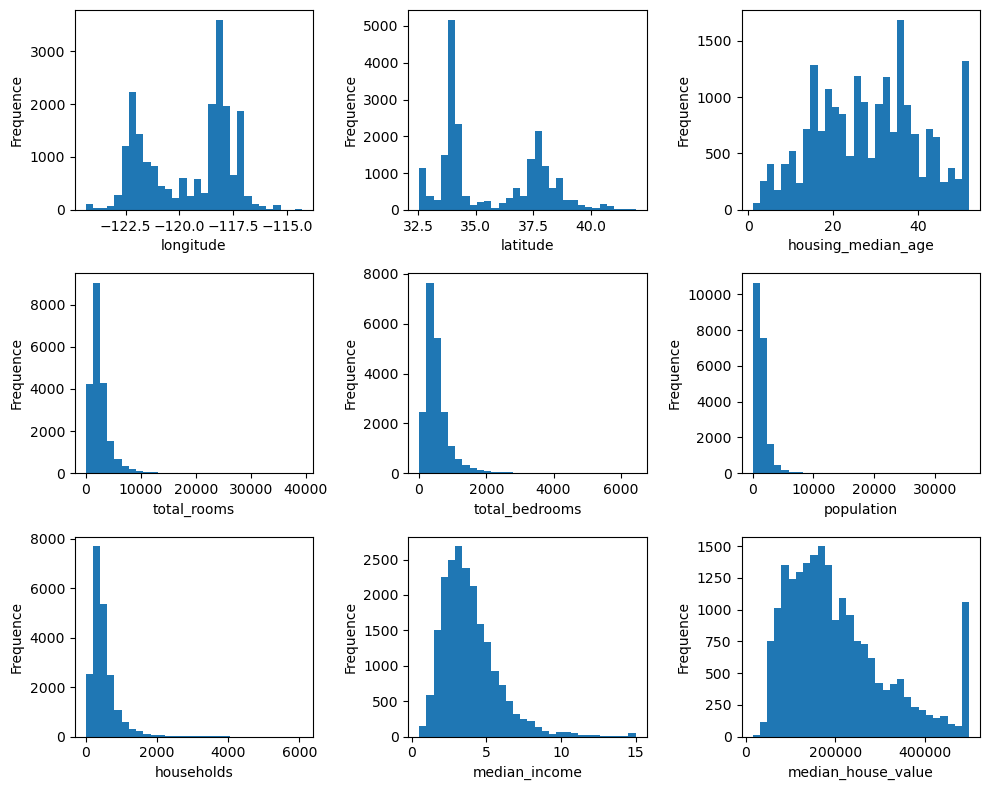

In [9]:
#selection des variables quantitaves
quant_vars = data.select_dtypes(include=np.number).columns

#creation des subplots pour chaque variables sur la mm figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
axes = axes.flatten() #aplatir axes en une structure a une seule dimension  
for i, var in enumerate(quant_vars):
    axes[i].hist(data[var], bins=30)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequence')
plt.tight_layout()
plt.show()

# description de la variable categorielle ocean_proximity

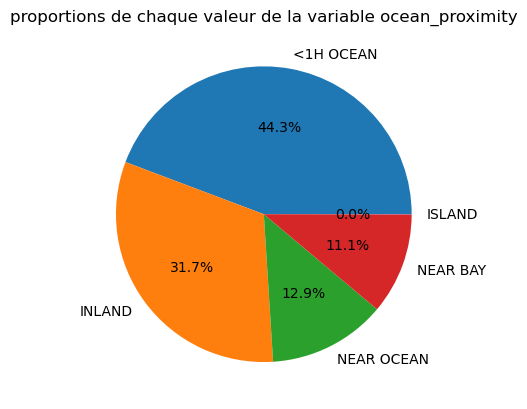

In [10]:
prop_counts = data['ocean_proximity'].value_counts(normalize=True)

#creation du pie chart
plt.pie(prop_counts, labels=prop_counts.index, autopct='%1.1f%%')
plt.title('proportions de chaque valeur de la variable ocean_proximity')
plt.show()

# Analyse bivariees et selection des variables pertinentes


# Correlation entre variables numeriques

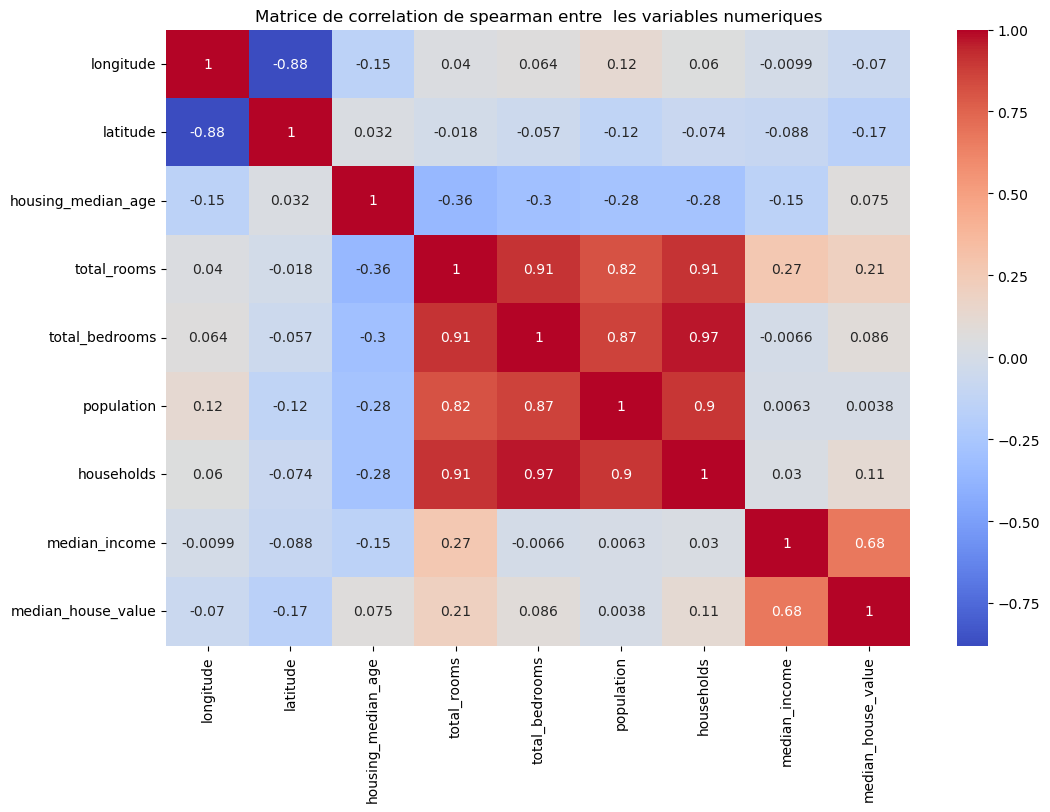

In [11]:
#selection des variables numerique
num_vars = data.select_dtypes(include = np.number).columns
#calcule de la matrice de correlation de spearman
coor_matrix = data[num_vars].corr(method='spearman')

#Affichage de la matrice de correlation de spearman
plt.figure(figsize=(12,8))
sns.heatmap(coor_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de correlation de spearman entre  les variables numeriques')
plt.show()

# Relation entre la variable cible et les variables numeriques

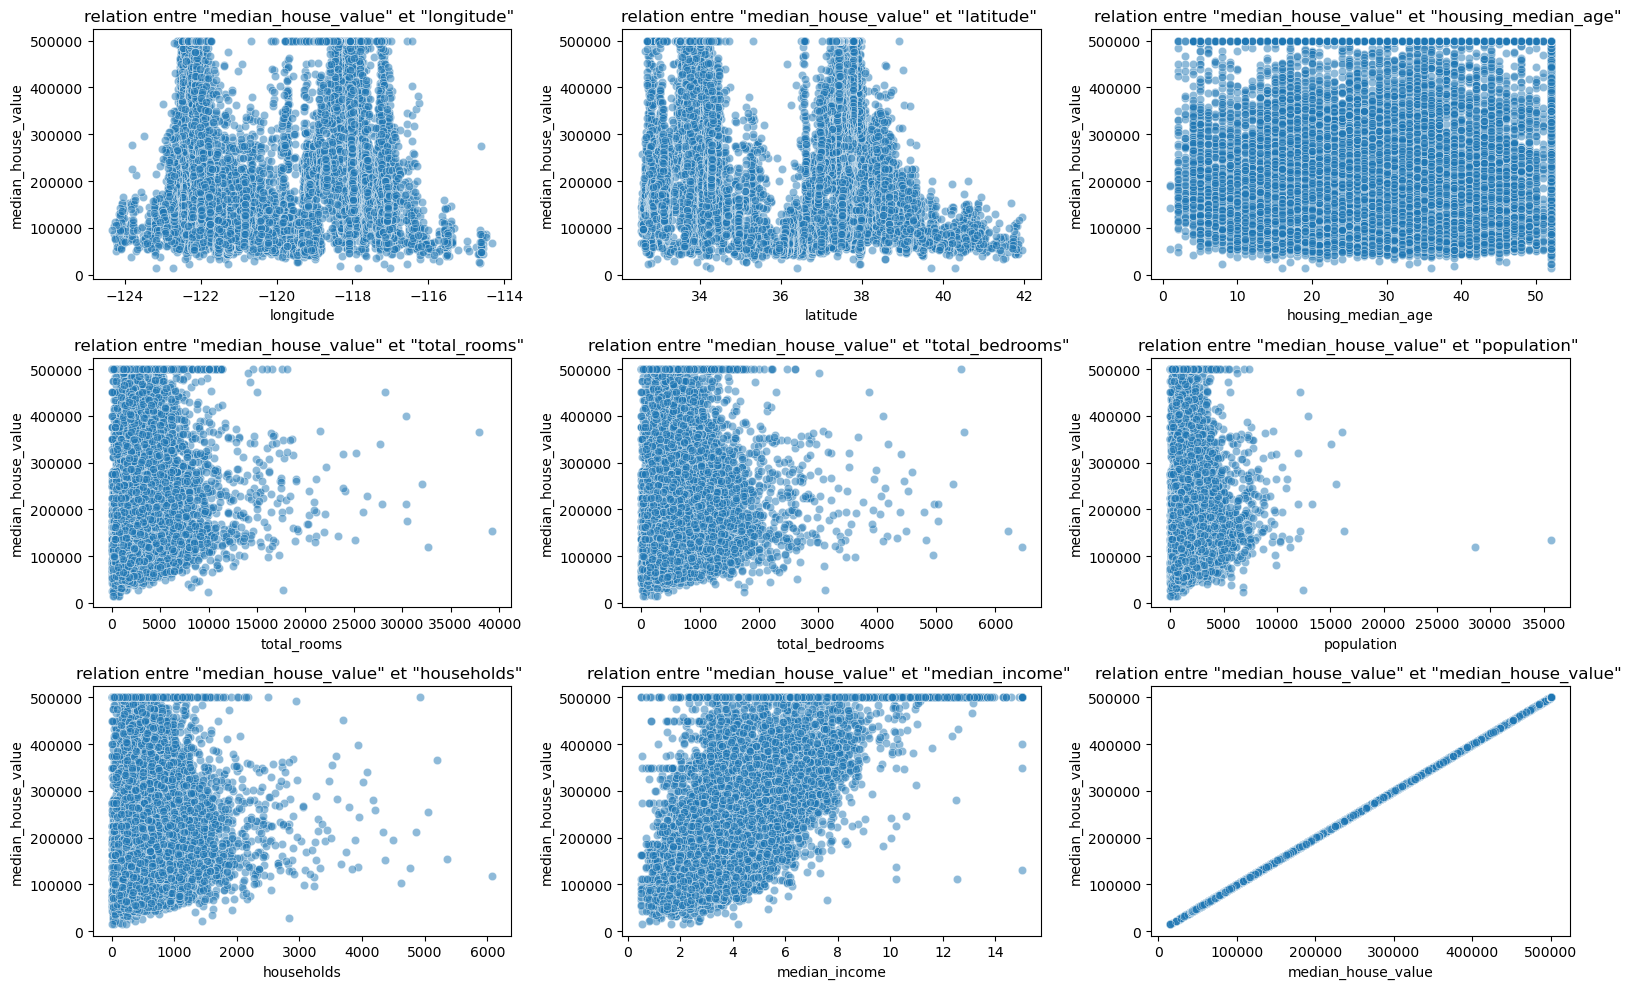

In [12]:
#selection des variables numeriquees
num_vars = data.select_dtypes(include =np.number).columns

#calcul de la taille de la matrice des subplots en fonction du nombre de variable numerique
n_cols = 3
n_rows = int(np.ceil(len(num_vars)/n_cols))

#Affichage des scatterplot pour chaque variable numerique
fig, axes = plt.subplots(nrows = n_rows, ncols=n_cols, figsize=(16, 10))
axes = axes.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='median_house_value', data=data, alpha=0.5, ax = axes[i])
    axes[i].set_title('relation entre "median_house_value" et "{}" '.format(var))
    
#Ajout des titres et des etiquettes des axes 
plt.tight_layout()
plt.show()

# Relation entre la variable cible et les variables categorielles

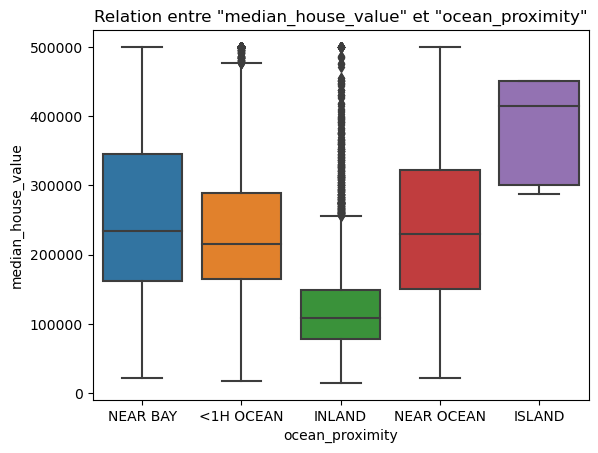

In [13]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Relation entre "median_house_value" et "ocean_proximity"')
plt.show()

# Modelisation du prix du bien immobilier 

1.Variables

In [14]:
from sklearn.preprocessing import OneHotEncoder

#selection des variebles categorielles
cat_vars = ['ocean_proximity']

#ENcodage binaire des variables categorielles
encoder = OneHotEncoder(sparse= False)
cat_data = pd.DataFrame(encoder.fit_transform(data[cat_vars]))
cat_data.columns = encoder.get_feature_names_out(cat_vars)

#remplacement des variables categorielles par les variables encodees
data = pd.concat([data.drop(cat_vars, axis=1), cat_data], axis=1)

C:\Users\USER\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [16]:
#separation des donnees en variables explicatives et variables cibles
x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [17]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,0.0


In [18]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

# Division de la base en train test

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Arbre de regression non optimiser Construction

In [20]:
from sklearn.tree import plot_tree

In [21]:
tree = DecisionTreeRegressor(random_state = 42)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
#Affiche de l'arbre
"""plt.figure(figsize=(15, 10))
plot_tree(tree,filled=True)
plt.show()
"""

'plt.figure(figsize=(15, 10))\nplot_tree(tree,filled=True)\nplt.show()\n'

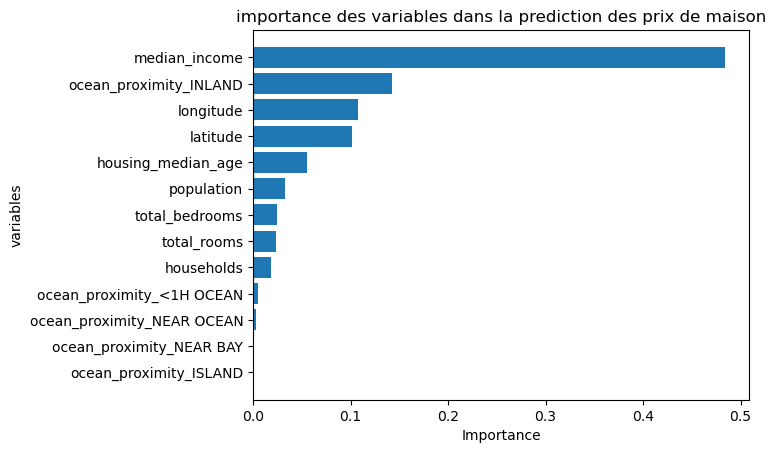

In [23]:
#Affichage de l'importance des variables 
importance = pd.Series(tree.feature_importances_ ,index=X_train.columns)
importance_sorted = importance.sort_values()
plt.barh(importance_sorted.index, importance_sorted)
plt.title('importance des variables dans la prediction des prix de maison')
plt.xlabel('Importance')
plt.ylabel('variables')
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, r2_score

In [25]:
#prediction sur la base d'apprentissage et la base de test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Evaluation de L'arbre de decision non optimisé

# Calcule des metriques 

In [26]:
#calcul des metriques sur la base d'apprentissage et la base de test
train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))

train_mae = mean_absolute_error(Y_train, y_train_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)

train_medae = median_absolute_error(Y_train, y_train_pred)
test_medae = median_absolute_error(Y_test, y_test_pred)

train_r2 = r2_score(Y_train, y_train_pred)
test_r2 = r2_score(Y_test, y_test_pred)

train_evs = explained_variance_score(Y_train, y_train_pred)
test_evs = explained_variance_score(Y_test, y_test_pred)

#Affichage des resultats dans un tableau
results = pd.DataFrame({'Metrique' :['RMSE', 'MAE', 'MedAE', 'R2', 'EVS'],
                       'Apprentissage' :[train_rmse, train_mae, train_medae, train_r2, train_evs],
                       'Test' :[test_rmse, test_mae, test_medae, test_r2, test_evs]})
results.set_index('Metrique', inplace=True)
print(results)

          Apprentissage          Test
Metrique                             
RMSE                0.0  69214.340302
MAE                 0.0  43655.371609
MedAE               0.0  25200.000000
R2                  1.0      0.634418
EVS                 1.0      0.634434


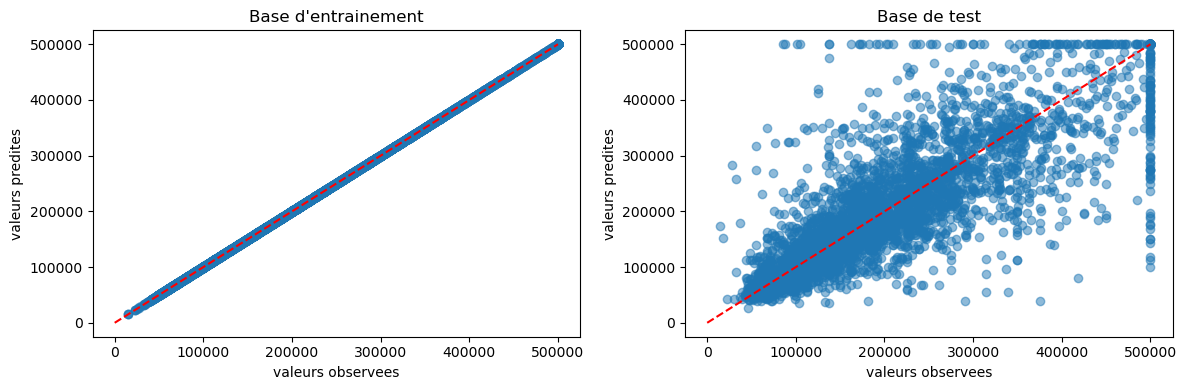

In [27]:
fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(12, 4))

#Graphique pour la base d'entrainnement
y_train_pred = tree.predict(X_train)
axes[0].scatter(Y_train, y_train_pred, alpha=0.5)
axes[0].plot([0, np.max(Y_train)], [0, np.max(Y_train)], 'r--')
axes[0].set_xlabel('valeurs observees')
axes[0].set_ylabel('valeurs predites')
axes[0].set_title('Base d\'entrainement')

#Graphique pour la base de test
y_train_pred = tree.predict(X_test)
axes[1].scatter(Y_test, y_test_pred, alpha=0.5)
axes[1].plot([0, np.max(Y_test)], [0, np.max(Y_test)], 'r--')
axes[1].set_xlabel('valeurs observees')
axes[1].set_ylabel('valeurs predites')
axes[1].set_title('Base de test')

#Affichage des graphiques
plt.tight_layout()
plt.show()

# Optimisation de l'arbre avec un elagage (pruning)

In [37]:
#selection des variables les plus impactant dans la prediction de notre target
x = data.drop(['median_house_value','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY', 'total_rooms', 'ocean_proximity_NEAR OCEAN', 'households','population', 'total_bedrooms','ocean_proximity_<1H OCEAN'], axis=1)
y = data['median_house_value']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Profondeur optimale : 10


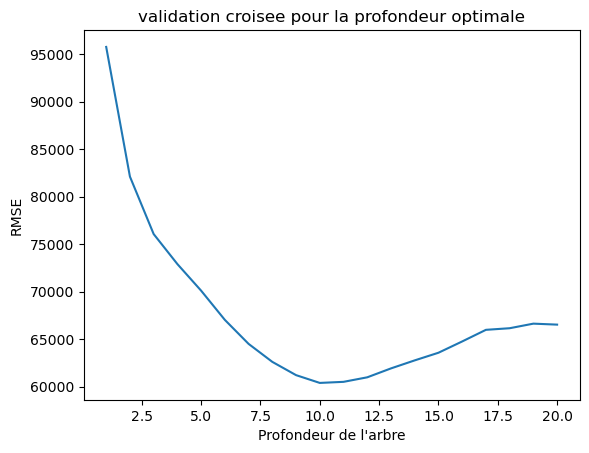

In [38]:
from sklearn.model_selection import GridSearchCV

#definition de la grille de parametre 
param_grid = {'max_depth' : np.arange(1, 21)}

#Instanciation de l'estimateur de l'arbre de decision
tree = DecisionTreeRegressor(random_state=42)

#Instanciation de l'objet GridSearchCV
grid_tree = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')

#entrainement de l'objet GridSearchCV
grid_tree.fit(X_train, Y_train)

#Affichage de la profondeur optimale
print("Profondeur optimale :", grid_tree.best_params_['max_depth'])

#Affichage de la courbe de validation croisee pour la profondeur de l'arbre

plt.plot(param_grid['max_depth'], np.sqrt(-grid_tree.cv_results_['mean_test_score']))
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('RMSE')
plt.title("validation croisee pour la profondeur optimale")
plt.show()

# Construction de l'abre de decision optimisé 

In [39]:
#Affichage d'un nouvel arbre avec la profondeur optimale
tree_optimal = DecisionTreeRegressor(max_depth = grid_tree.best_params_['max_depth'], random_state=42)
tree_optimal.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

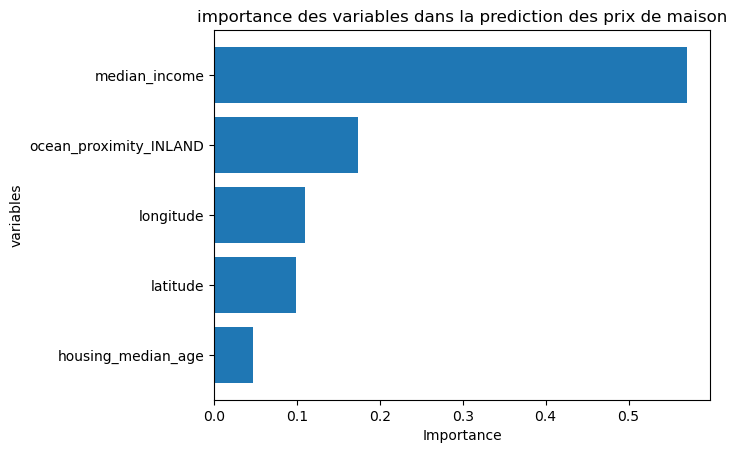

In [40]:
#Affichage de l'importance des variables 
importance = pd.Series(tree_optimal.feature_importances_ ,index=X_train.columns)
importance_sorted = importance.sort_values()
plt.barh(importance_sorted.index, importance_sorted)
plt.title('importance des variables dans la prediction des prix de maison')
plt.xlabel('Importance')
plt.ylabel('variables')
plt.show()

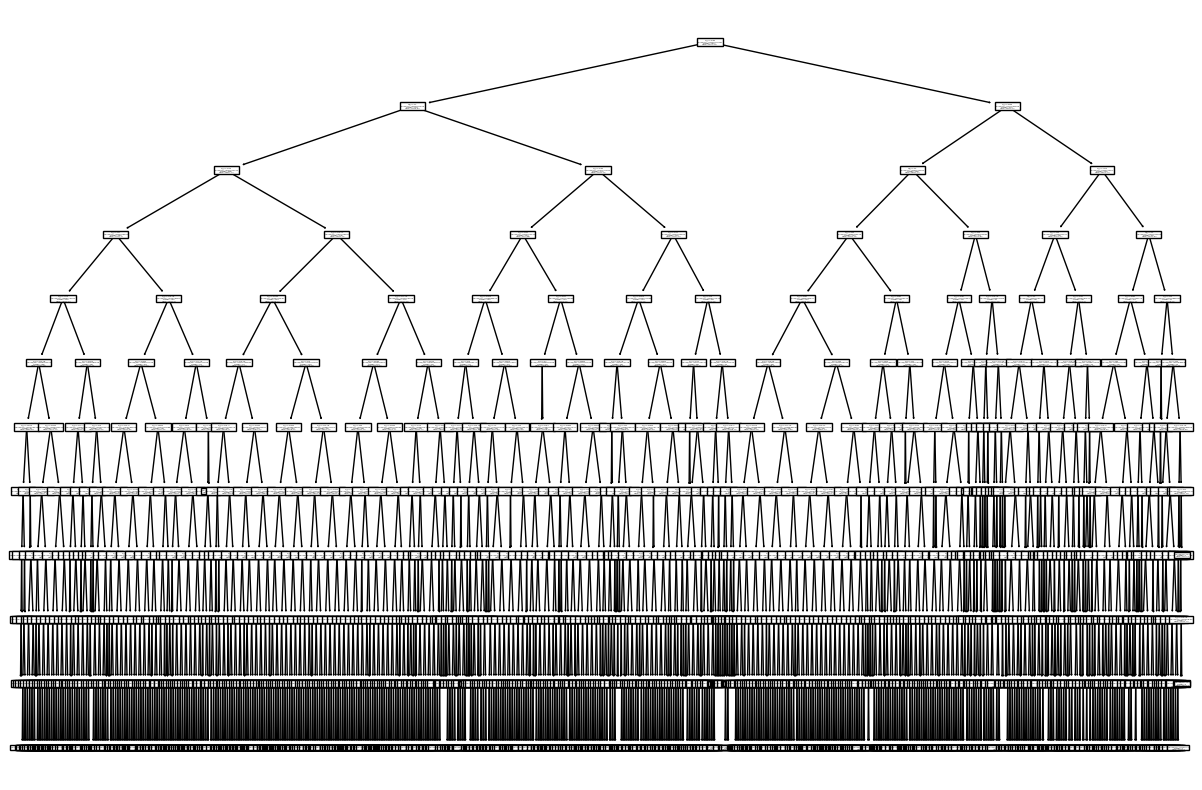

In [32]:
#AFFichage de l'arbre optimale
plt.figure(figsize=(15, 10))
plot_tree(tree_optimal,  filled=False)
plt.show()

# Evaluation de L'arbre de decision optimisé

# Calcule des metriques 

In [41]:
#prdiction sur la base d'apprentissage et sur la base de test
y_train_pred = tree_optimal.predict(X_train)
y_test_pred = tree_optimal.predict(X_test)

#calcul des metriques sur la base d'apprentissage et la base de test
train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))

train_mae = mean_absolute_error(Y_train, y_train_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)

train_medae = median_absolute_error(Y_train, y_train_pred)
test_medae = median_absolute_error(Y_test, y_test_pred)

train_r2 = r2_score(Y_train, y_train_pred)
test_r2 = r2_score(Y_test, y_test_pred)

train_evs = explained_variance_score(Y_train, y_train_pred)
test_evs = explained_variance_score(Y_test, y_test_pred)

#Affichage des resultats dans un tableau
results = pd.DataFrame({'Metrique' :['RMSE', 'MAE', 'MedAE', 'R2', 'EVS'],
                       'Apprentissage' :[train_rmse, train_mae, train_medae, train_r2, train_evs],
                       'Test' :[test_rmse, test_mae, test_medae, test_r2, test_evs]})
results.set_index('Metrique', inplace=True)
score  = tree_optimal.score(X_train, Y_train)
score2  = tree_optimal.score(X_test, Y_test)
print(results)
print('score :\t {} \t\t {}'.format(score, score2))

          Apprentissage          Test
Metrique                             
RMSE       48976.186284  59513.721578
MAE        32698.036050  39523.946363
MedAE      21658.971963  25532.345013
R2             0.820564      0.729712
EVS            0.820564      0.729717
score :	 0.8205635907450718 		 0.7297116308784275


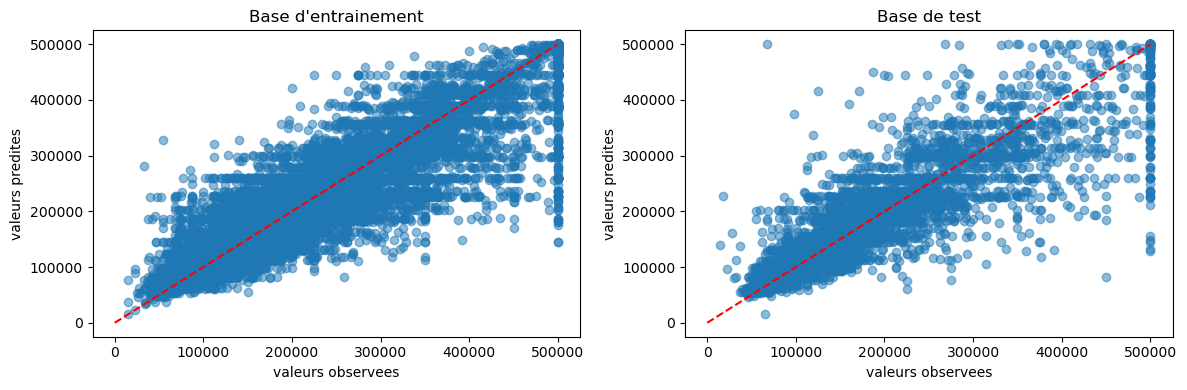

In [42]:
    fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(12, 4))

    #Graphique pour la base d'entrainnement
    y_train_pred = tree_optimal.predict(X_train)
    axes[0].scatter(Y_train, y_train_pred, alpha=0.5)
    axes[0].plot([0, np.max(Y_train)], [0, np.max(Y_train)], 'r--')
    axes[0].set_xlabel('valeurs observees')
    axes[0].set_ylabel('valeurs predites')
    axes[0].set_title('Base d\'entrainement')

    #Graphique pour la base de test
    y_train_pred = tree_optimal.predict(X_test)
    axes[1].scatter(Y_test, y_test_pred, alpha=0.5)
    axes[1].plot([0, np.max(Y_test)], [0, np.max(Y_test)], 'r--')
    axes[1].set_xlabel('valeurs observees')
axes[1].set_ylabel('valeurs predites')
axes[1].set_title('Base de test')

#Affichage des graphiques
plt.tight_layout()
plt.show()

# Application pratique et Recommandation

# Methode pour tester notre modèle pour des prédictions de prix de maisons

In [43]:
def utilisateur():
    long=input("entrez la longueur de votre maison:\t")
    lat=input("entrez la latitude de votre maison:\t")
    age=input("Quel est l'âge median de votre maison ?\t")
    revenu=input("Quel est votre revenu median?\t")
    prox=input("la proximité de la maison à l'océan est à : \n1)0.0 \n2)1.0\n")
    if prox==1:
        prox=0.0
    elif prox==2:
        prox=1.0
    else:
        prox=1.0
    PredirePrix(long=long,lat=lat,age=age,revenue=revenu,proximite=prox)

def PredirePrix(model=tree_optimal,long=122,lat=37,age=31,revenue=3.84,proximite=1.0):
    x_test=np.array([long,lat,age,revenue,proximite]).reshape(1,5)
    
    result=model.predict(x_test)
    print(f"le prix de votre maison est de : {int(result[0])} £")
    
utilisateur()

entrez la longueur de votre maison:	-122
entrez la latitude de votre maison:	123
Quel est l'âge median de votre maison ?	22
Quel est votre revenu median?	5
la proximité de la maison à l'océan est à : 
1)0.0 
2)1.0
1
le prix de votre maison est de : 191165 £


C:\Users\USER\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
